In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pplt
import matplotlib as plt
import re

In [378]:
%matplotlib inline

In [373]:
summary = pd.read_csv("atussum_2013.dat")
activity = pd.read_csv("atusact_2013.dat")
respondents = pd.read_csv("atusresp_2013.dat")

In [136]:
summary.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [137]:
activity.head()

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,...,TUDURSTOP,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20130101130004,1,-1,0,0,0,-1,0,0,-1,...,2,-1,04:00:00,12:00:00,1,1,1,10101,101,0
1,20130101130004,2,1,5,5,0,-1,5,5,-1,...,1,-1,12:00:00,12:05:00,11,1,1,110101,1101,0
2,20130101130004,3,1,120,120,0,-1,120,120,-1,...,1,-1,12:05:00,14:05:00,12,3,3,120303,1203,0
3,20130101130004,4,1,0,0,0,-1,0,0,-1,...,2,-1,14:05:00,19:00:00,6,3,1,60301,603,0
4,20130101130004,5,1,30,30,0,-1,30,30,-1,...,1,-1,19:00:00,19:30:00,11,1,1,110101,1101,0


In [138]:
respondents.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20130101130004,1,2013,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
1,20130101130112,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,0,0,0,0,-1,0,0,-1
2,20130101130123,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,-1,0,0,-1,-1,-1,-1,-1
3,20130101130611,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20130101130616,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1


In [139]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


In [140]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215576 entries, 0 to 215575
Data columns (total 31 columns):
TUCASEID        215576 non-null int64
TUACTIVITY_N    215576 non-null int64
TEWHERE         215576 non-null int64
TRTCCTOT_LN     215576 non-null int64
TRTCC_LN        215576 non-null int64
TRTCOC_LN       215576 non-null int64
TRTEC_LN        215576 non-null int64
TRTHH_LN        215576 non-null int64
TRTNOHH_LN      215576 non-null int64
TRTOHH_LN       215576 non-null int64
TRTONHH_LN      215576 non-null int64
TRTO_LN         215576 non-null int64
TRWBELIG        215576 non-null int64
TUACTDUR        215576 non-null int64
TUACTDUR24      215576 non-null int64
TUCC5           215576 non-null int64
TUCC5B          215576 non-null int64
TUCC7           215576 non-null int64
TUCC8           215576 non-null int64
TUCUMDUR        215576 non-null int64
TUCUMDUR24      215576 non-null int64
TUDURSTOP       215576 non-null int64
TUEC24          215576 non-null int64
TUSTARTTIM     

In [141]:
respondents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 175 entries, TUCASEID to TXTONHH
dtypes: float64(1), int64(172), object(2)
memory usage: 15.3+ MB


In [10]:
# TEHRFTPT Edited: do you usually work more than 35 hours per week at your Respondent File job(s)/family business? 
# Respondent File
# Edited Universe: TEHRUSL1 = -4 or TEHRUSL2 = -4
# ValidEntries: 1 Yes 2 No 3 Hours vary

In [11]:
# TRHOLIDAY Flag to indicate if diary day was a holiday Respondent File, Activity Summary File
# Edited Universe: All respondents
# Valid Entries: 0 Diary day was not a holiday 1 Diary day was a holiday

In [12]:
# TRTALONE Total nonwork-related time respondent spent alone (in minutes) Respondent File
# Edited Universe: All respondents
#Valid Entries: 0 Min Value 1440 Max Value
# Note: This variable is computed using TUWHO_CODE information; time spent working and all activities for which who
# information is not collected, such as sleeping, are omitted from the calculation

In [24]:
boating = summary['t130106']

In [34]:
help(boating)

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be any hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN)
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, or scalar value
 |      Contains data stored in Series
 |  index : array-like or Index (1d)
 |      Values must be unique and hashable, same length as data. Index
 |      object (or other

In [59]:
boating.head()

0    0
1    0
2    0
3    0
4    0
Name: t130106, dtype: int64

In [79]:
summary[ summary['t130106'] > 0][['tucaseid', 't130106']].sort('t130106')[::-1]

,tucaseid,t130106
8224,20130908131297,380
2153,20130301131895,295
7714,20130808130047,250
5822,20130606130005,240
7692,20130807132482,180
5854,20130606130745,180
6934,20130707132503,150
7614,20130807132223,120
6999,20130806131317,120
5482,20130605131560,120


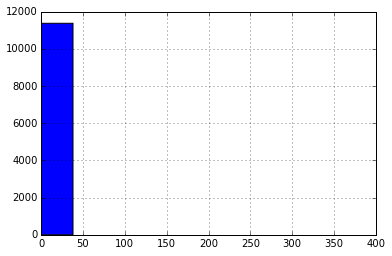

In [67]:
boating.hist()

In [37]:
religious = summary['t140102']

In [39]:
religious.describe()

count    11385.000000
mean         2.774616
std         18.594046
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        615.000000
Name: t140102, dtype: float64

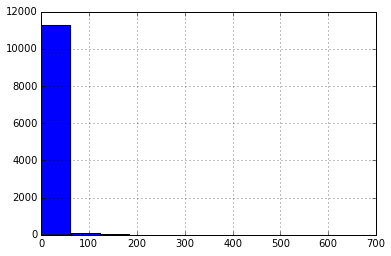

In [40]:
religious.hist()

In [142]:
def average_minutes(data, activity_code):
    activity_col = "t{}".format(activity_code)
    data = data[['TUFINLWGT', activity_col]]
    data = data.rename(columns={"TUFINLWGT": "weight", activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [143]:
adults = summary.TEAGE >= 18
no_kids = summary.TRCHILDNUM == 0
kids = summary.TRCHILDNUM >= 1

In [144]:
adults1 = summary[adults]

In [145]:
adults1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10953 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 34.6 MB


In [146]:
no_kids1 = summary[no_kids]

In [147]:
no_kids1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6481 entries, 2 to 11381
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 20.5 MB


In [148]:
adults_with_no_kids = summary[adults & no_kids]
adults_with_kids = summary[adults & kids]

In [149]:
adults_with_no_kids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6481 entries, 2 to 11381
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 20.5 MB


In [150]:
adults_with_no_kids.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
5,20130101130619,2372791.046351,-1,80,2,38,1,2,1,5,...,0,0,0,0,0,0,0,0,0,0
6,20130101130658,5671341.270490,-1,72,1,42,1,1,1,5,...,0,0,5,0,0,0,0,0,0,0


In [151]:
average_minutes(adults_with_no_kids, "140102")

2.6522939088921156

In [152]:
churchies = average_minutes(adults_with_no_kids, "140102")

In [153]:
churchies / 60

0.044204898481535262

In [154]:
average_minutes(adults_with_no_kids, "130106")

0.1397218727470336

In [155]:
boaters = average_minutes(adults_with_no_kids, "130106")

In [156]:
boaters / 60

0.0023286978791172267

In [157]:
adults_with_no_kids = summary[adults & no_kids]
adults_with_kids = summary[adults & kids]

In [ ]:
adults_no_kids_relaxing = summary[adults & relaxing]

In [ ]:
relaxing_leisure = summary[filter(lambda x: x.startswith("t1203"), summary.columns)]

In [159]:
summary.columns

Index(['tucaseid', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 
       ...
       't181501', 't181599', 't181601', 't181801', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=413)

In [160]:
def activity_columns(data, activity_code):
    """For the activity code given, return all columns that fall under that activity."""
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

In [161]:
relaxing = activity_columns(summary, '1203')

In [331]:
sporting = activity_columns(summary, '1301')

In [162]:
relaxing

['t120301',
 't120302',
 't120303',
 't120304',
 't120305',
 't120306',
 't120307',
 't120308',
 't120309',
 't120310',
 't120311',
 't120312',
 't120313',
 't120399']

In [ ]:
relaxing_no_kids = average_minutes(adults_with_no_kids, relaxing)

In [164]:
def average_minutes2(data, activity_code):
    cols = activity_columns(data, activity_code)
    activity_data = data[cols]
    activity_sums = activity_data.sum(axis=1)
    data = data[['TUFINLWGT']]
    data['minutes'] = activity_sums
    data = data.rename(columns={"TUFINLWGT": "weight"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [165]:
average_minutes2(adults_with_kids, '1203') / 60

/Users/AaronPentz/ironyard/sandbox/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2.9043192544045344

In [166]:
average_minutes2(adults_with_no_kids, '1203') / 60

/Users/AaronPentz/ironyard/sandbox/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4.5232723948406806

In [167]:
no_kids_clean = adults_with_no_kids[['TUFINLWGT', 'TEAGE', 'TRERNWA', 't120301', 't120302', 't120303', 't120304',
                                     't120305', 't120306', 't120307', 't120308', 't120309', 't120310', 't120311',
                                     't120312', 't120313']]

In [170]:
no_kids_clean.sort('TRERNWA')[::-1]

,TUFINLWGT,TEAGE,TRERNWA,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120310,t120311,t120312,t120313
3533,6085121.111850,41,288461,0,0,0,0,0,0,0,180,0,0,0,0,0
8036,5060395.475988,49,288461,30,0,40,0,0,0,0,0,0,0,0,0,0
3977,16619132.465525,60,288461,0,0,120,0,0,0,0,0,0,0,0,60,0
11162,5355796.582841,52,288461,60,0,30,0,0,0,0,165,0,0,0,0,0
646,11894472.492400,48,288461,0,0,0,0,0,0,0,0,0,0,0,0,0
8045,15001479.611238,60,288461,0,0,0,0,0,0,0,0,0,0,0,50,0
3946,24488792.443303,40,288461,30,5,190,0,0,0,0,0,0,0,0,0,0
3894,4213691.902140,44,288461,0,0,0,0,0,0,0,0,0,0,0,0,0
9093,2157405.055544,57,288461,0,0,0,0,0,0,0,0,0,0,0,0,0
6298,27499917.847436,30,288461,0,0,15,0,0,0,0,0,0,0,0,0,0


In [205]:
no_kids_tv = average_minutes2(no_kids_clean, '120303')

/Users/AaronPentz/ironyard/sandbox/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [206]:
type(no_kids_tv)

numpy.float64

In [207]:
no_kids_tv

190.25402840855642

In [381]:
kids_clean = adults_with_kids[['TUFINLWGT', 'TEAGE', 'TRERNWA', 't120301', 't120302', 't120303', 't120304',
                                     't120305', 't120306', 't120307', 't120308', 't120309', 't120310', 't120311',
                                     't120312', 't120313']]

In [382]:
no_age_kids_clean = adults_with_kids[['t120301', 't120302', 't120303', 't120304',
                                     't120305', 't120306', 't120307', 't120308', 't120309', 't120310', 't120311',
                                     't120312', 't120313']]

In [383]:
no_age_no_kids_clean = adults_with_no_kids[['t120301', 't120302', 't120303', 't120304',
                                     't120305', 't120306', 't120307', 't120308', 't120309', 't120310', 't120311',
                                     't120312', 't120313']]

In [384]:
kids_clean_sports = adults_with_kids[['TEAGE', 't130102', 't130103', 't130104', 't130109', 't130112', 't130113', 't130114',
                                     't130116', 't130118', 't130124', 't130125', 't130126', 't130131', 't130134']]

In [385]:
no_age_kids_clean_sports = adults_with_kids[['t130102', 't130103', 't130104', 't130109', 't130112', 't130113', 't130114',
                                     't130116', 't130118', 't130124', 't130125', 't130126', 't130131', 't130134']]

In [386]:
no_age_no_kids_clean_sports = adults_with_no_kids[['t130102', 't130103', 't130104', 't130109', 't130112', 't130113', 't130114',
                                     't130116', 't130118', 't130124', 't130125', 't130126', 't130131', 't130134']]

In [387]:
no_kids_clean_sports = adults_with_no_kids[['TEAGE', 't130102', 't130103', 't130104', 't130109', 't130112', 't130113', 't130114',
                                     't130116', 't130118', 't130124', 't130125', 't130126', 't130131', 't130134']]

In [388]:
none_ya_no_kids = adults_with_no_kids[['TEAGE', 't500105']]

In [389]:
none_ya_kids = adults_with_kids[['TEAGE', 't500105']]

In [390]:
type(kids_clean['t120303'])

pandas.core.series.Series

In [391]:
import seaborn as sns

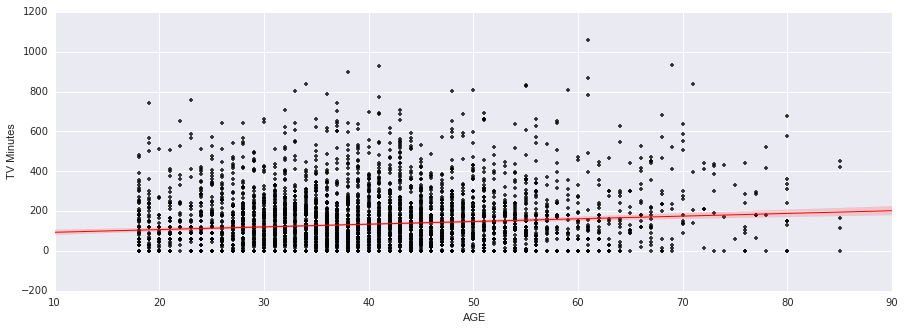

In [327]:
fig = pplt.figure(figsize=(15,5))
x, y = pd.Series(kids_clean['TEAGE'], name="AGE"), pd.Series(kids_clean['t120303'], name="TV Minutes")
ax = sns.regplot(x=x, y=y, marker='+', line_kws = { "color": "red", "linewidth":1}, color='black')

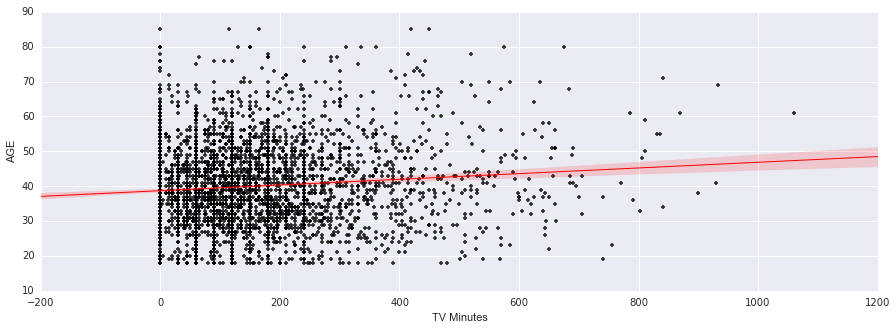

In [328]:
fig = pplt.figure(figsize=(15,5))
x, y = pd.Series(kids_clean['t120303'], name="TV Minutes"), pd.Series(kids_clean['TEAGE'], name="AGE")
ax = sns.regplot(x=x, y=y, marker='+', line_kws = { "color": "red", "linewidth":1}, color='black')

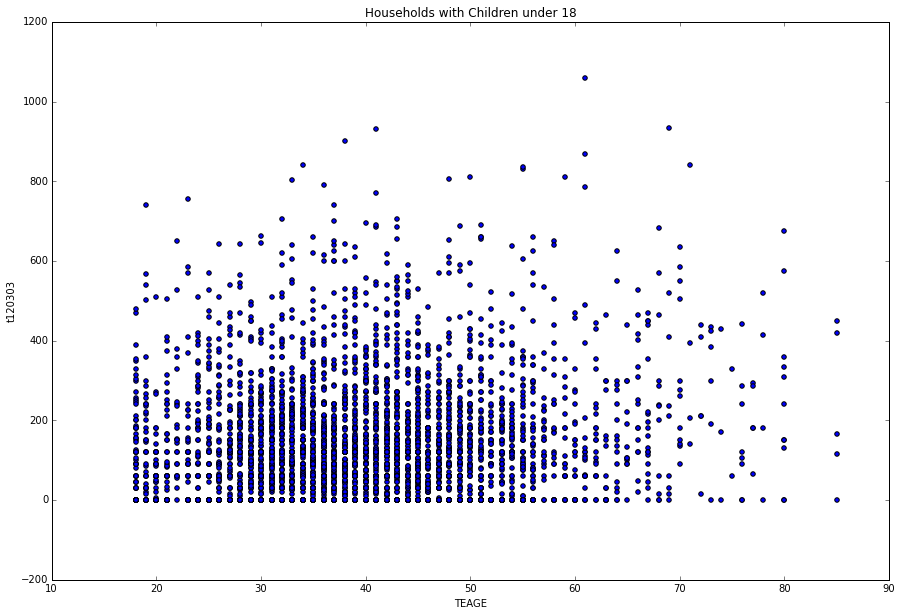

In [286]:
tlt = "Households with Children under 18"
kid_scatter = kids_clean.plot(kind='scatter', x='TEAGE', y='t120303', title=tlt, figsize=(15,10))


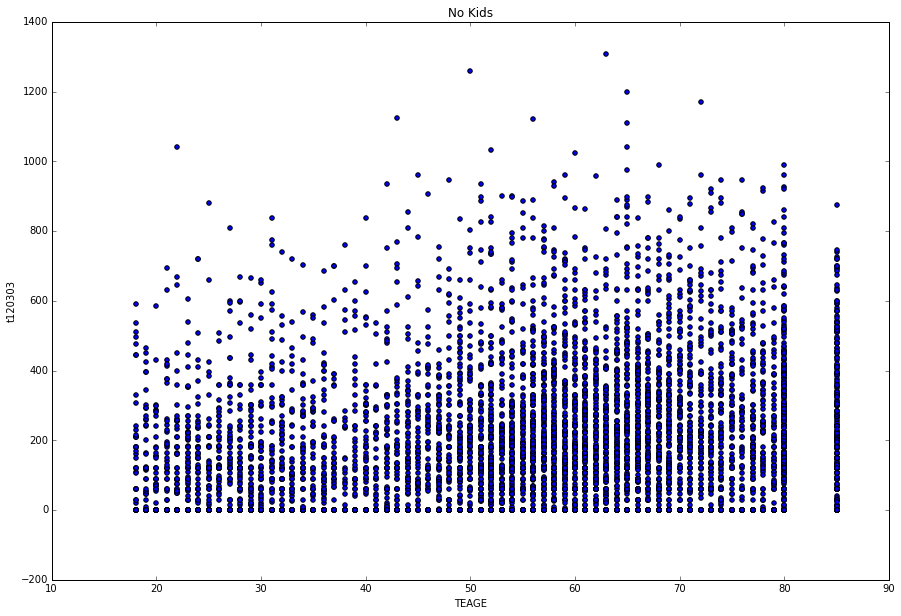

In [292]:
no_kid_scatter = no_kids_clean.plot(kind='scatter', x='TEAGE', y='t120303', title="No Kids", figsize=(15,10))

In [245]:
kids_tv = average_minutes2(kids_clean, '120303')

/Users/AaronPentz/ironyard/sandbox/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [246]:
kids_tv

129.99480886502764

In [204]:
kids_clean.sort('TRERNWA')[::-1]

,TUFINLWGT,TEAGE,TRERNWA,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120310,t120311,t120312,t120313
3830,8794798.762764,38,288461,0,0,0,0,0,0,0,0,0,0,0,30,0
9168,7776684.362457,34,288461,0,0,0,0,0,0,0,0,0,0,0,0,0
226,5390290.826947,46,288461,0,0,150,0,0,0,0,0,0,0,0,0,0
6795,5988225.116284,56,288461,0,0,50,0,0,0,0,0,0,0,0,0,0
6773,21219706.380273,48,288461,0,0,30,0,0,0,0,135,0,0,0,0,0
6754,7790164.183713,50,288461,0,0,60,0,0,0,30,0,0,0,0,0,0
243,2538667.213198,56,288461,0,0,155,0,0,0,0,0,0,0,0,130,0
10478,28192971.131875,33,288461,30,0,120,0,0,0,0,0,0,0,0,0,0
3681,2833728.897875,50,288461,0,0,0,0,0,0,0,90,0,0,0,0,0
3688,6150391.367047,42,288461,0,0,0,0,0,0,0,0,0,0,0,0,0


In [199]:
type(no_kids_tv)

numpy.float64

In [198]:
type(kids_tv)

numpy.float64

In [202]:
no_kids_tv

3.1709004734759403

In [271]:
import matplotlib.pyplot as pplt

In [276]:
kids_clean.corr()

,TUFINLWGT,TEAGE,TRERNWA,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120311,t120312,t120313
TUFINLWGT,1.000000,-0.155138,-0.091540,0.022752,-0.009772,-0.034825,-0.014132,0.053800,0.006566,-0.010373,0.013028,-0.003965,-0.006810,-0.067199,-0.002863
TEAGE,-0.155138,1.000000,0.078508,0.083771,-0.021397,0.104921,0.002129,0.005525,-0.035055,-0.014677,0.006183,0.003374,-0.011158,0.113650,0.023887
TRERNWA,-0.091540,0.078508,1.000000,-0.057024,0.011725,-0.124885,-0.022023,-0.027758,-0.013108,-0.053188,-0.027810,-0.022274,0.030857,0.019283,0.006247
t120301,0.022752,0.083771,-0.057024,1.000000,-0.009782,-0.038511,-0.006950,0.009438,-0.019821,-0.004198,-0.029581,-0.009311,-0.005600,-0.018150,-0.003824
t120302,-0.009772,-0.021397,0.011725,-0.009782,1.000000,0.030220,-0.002007,-0.005771,-0.004964,0.003095,-0.001769,-0.002127,-0.001617,-0.011751,-0.002374
t120303,-0.034825,0.104921,-0.124885,-0.038511,0.030220,1.000000,0.009323,0.000771,-0.008831,-0.006935,-0.014770,-0.000125,-0.013172,-0.059609,-0.005019
t120304,-0.014132,0.002129,-0.022023,-0.006950,-0.002007,0.009323,1.000000,-0.001905,-0.002405,-0.004983,-0.006610,-0.001793,-0.000534,-0.004196,-0.000784
t120305,0.053800,0.005525,-0.027758,0.009438,-0.005771,0.000771,-0.001905,1.000000,-0.006916,0.023297,0.019034,-0.005155,-0.001535,-0.017527,-0.002254
t120306,0.006566,-0.035055,-0.013108,-0.019821,-0.004964,-0.008831,-0.002405,-0.006916,1.000000,0.026206,0.014494,0.007669,-0.001938,-0.002951,-0.002846
t120307,-0.010373,-0.014677,-0.053188,-0.004198,0.003095,-0.006935,-0.004983,0.023297,0.026206,1.000000,0.058092,0.007145,0.022212,0.006528,-0.001326


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13f312ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x140208978>]], dtype=object)

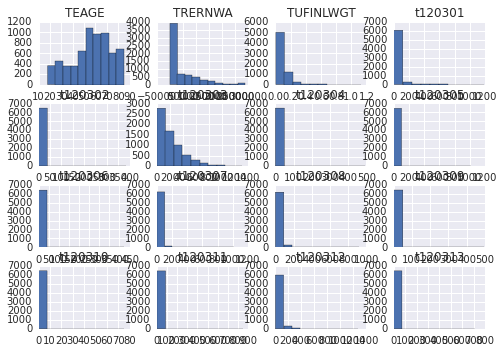

In [329]:
no_kids_clean.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x140266fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x138599080>]], dtype=object)

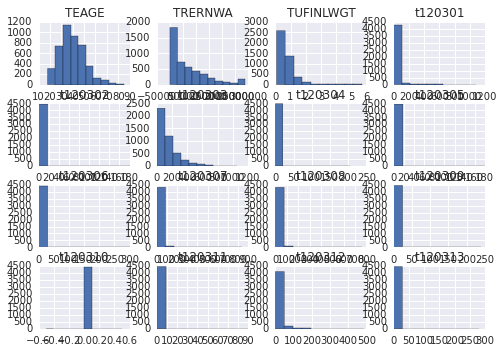

In [330]:
kids_clean.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13858dc50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13ca82c18>]], dtype=object)

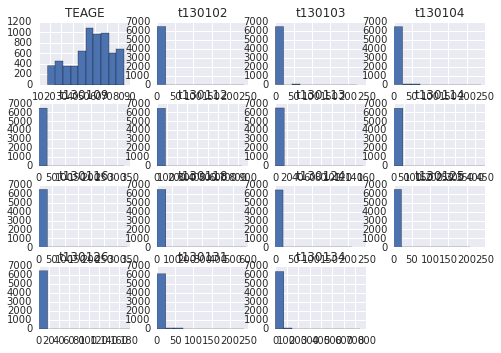

In [336]:
no_kids_clean_sports.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1388a0d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1181e3518>]], dtype=object)

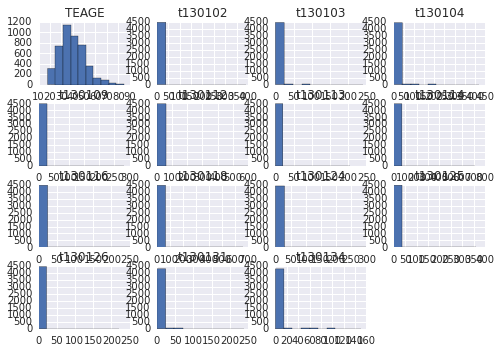

In [337]:
kids_clean_sports.hist()

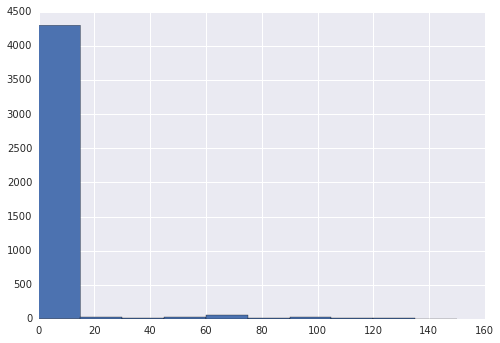

In [344]:
kids_clean_sports['t130134'].hist()
# 60 and 70 yr olds with kids workout the most?!?!?!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1388fba58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1389d37f0>]], dtype=object)

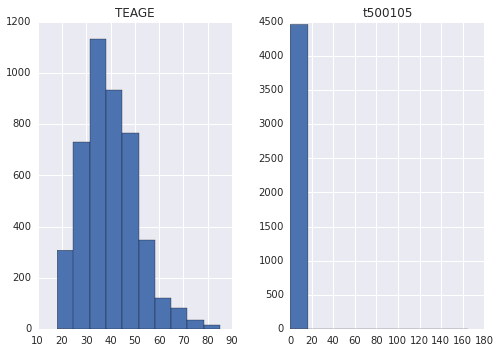

In [340]:
none_ya_kids.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x138b13e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x138b820b8>]], dtype=object)

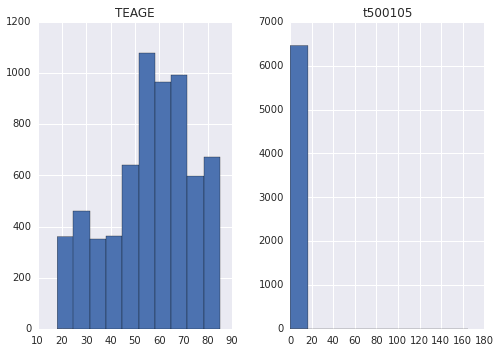

In [341]:
none_ya_no_kids.hist()

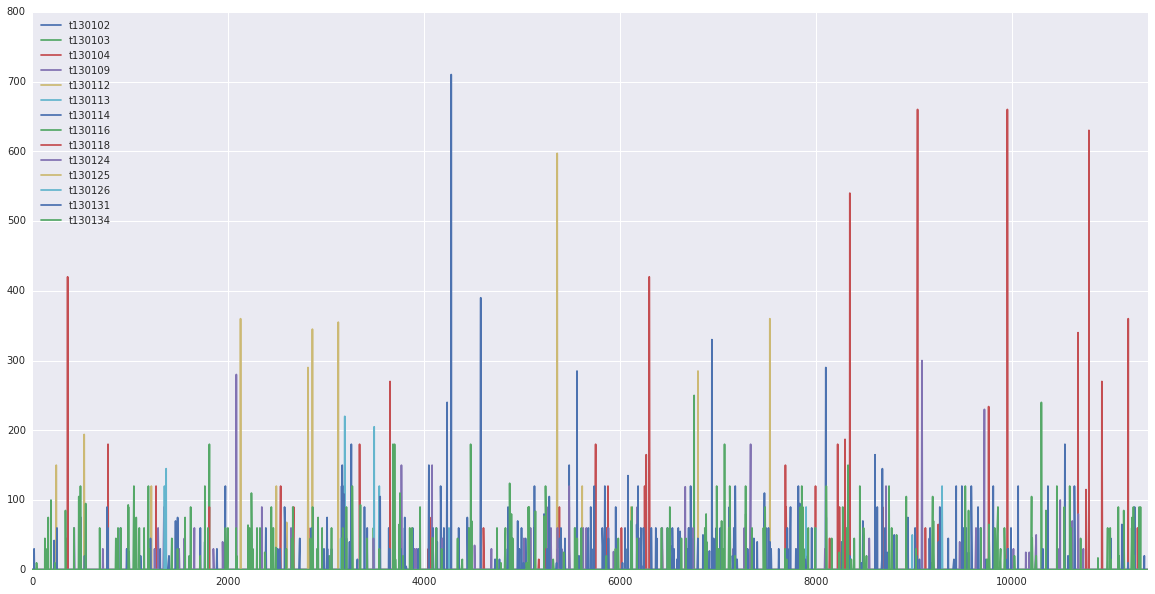

In [363]:
no_age_kids_clean_sports.plot(figsize=(20, 10))

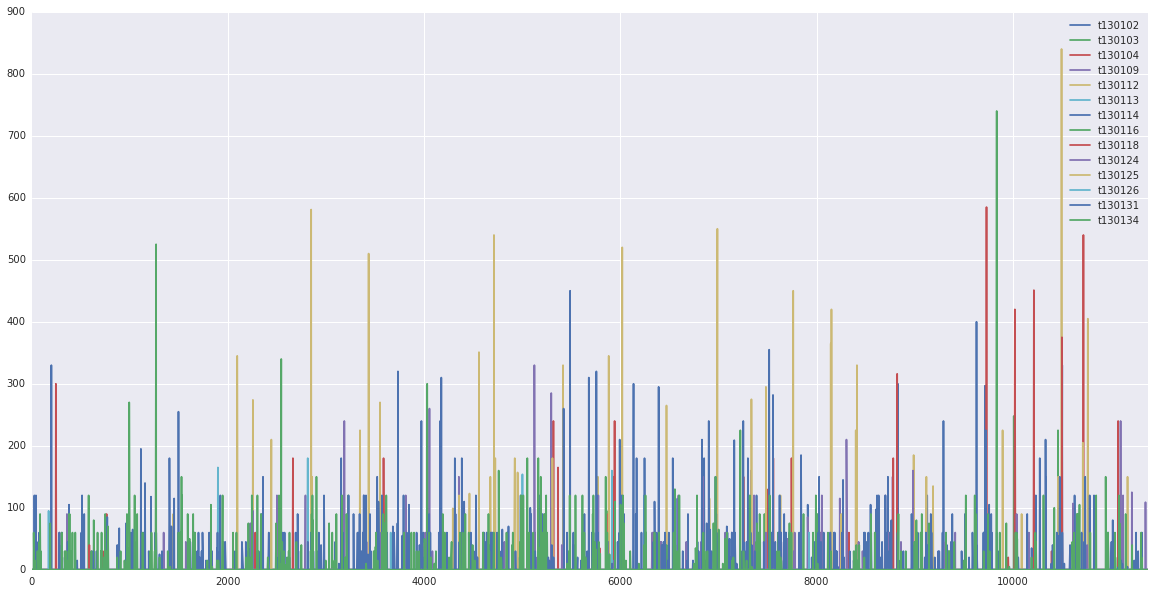

In [362]:
no_age_no_kids_clean_sports.plot(figsize=(20, 10))

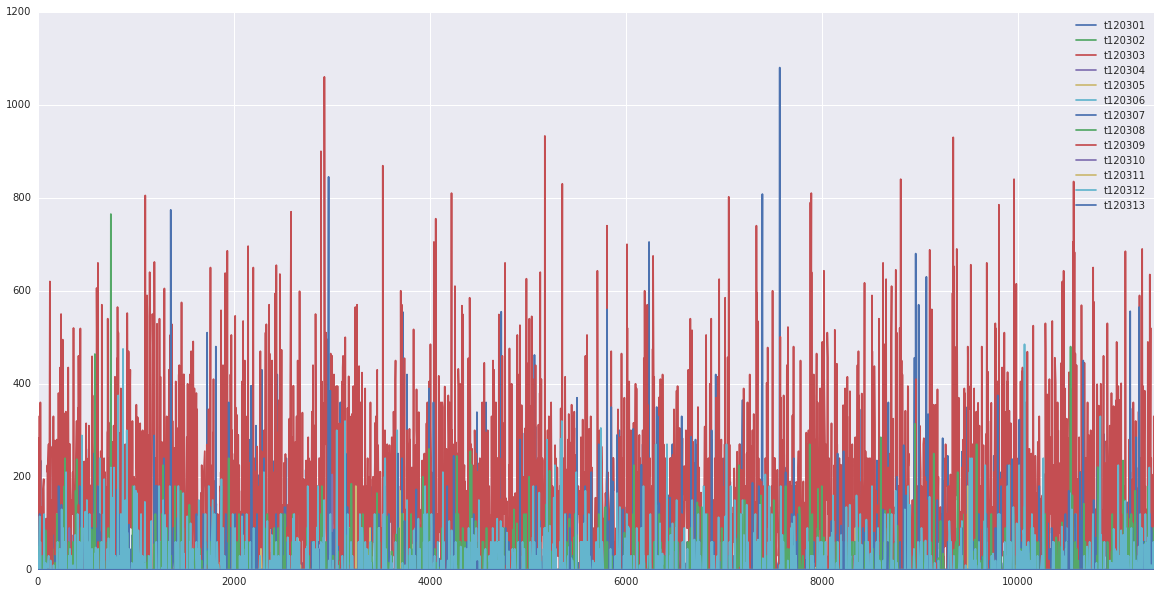

In [361]:
no_age_kids_clean.plot(figsize=(20, 10))

In [392]:
no_age_no_kids_clean.plot(figsize=(20,10))

KeyError: (-0.7029783505087384, -0.8460623137310949, '7266', '.15', 'center', 'right', 8432013002468138203, None, None, 72.0, 8807356456)

In [ ]:
no_age_kids_clean.plot(kind='pie', subplots=True, figsize=(6, 6))

In [ ]:
no_age_no_kids_clean.plot(kind='barh', subplots=True)